In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("../data/processed/cleaned_fashion_sales.csv")
df.head()

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method,year,month,weekday
0,4018,Handbag,4619.0,2023-02-05,3.0,Credit Card,2023,2,Sunday
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,2023,7,Tuesday
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,2023,3,Thursday
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,2023,3,Wednesday
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash,2022,11,Sunday


In [3]:
df.info()
df.describe(include='all')
df['item_purchased'].value_counts().head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_reference_id  2750 non-null   int64  
 1   item_purchased         2750 non-null   object 
 2   purchase_amount_(usd)  2750 non-null   float64
 3   date_purchase          2750 non-null   object 
 4   review_rating          2750 non-null   float64
 5   payment_method         2750 non-null   object 
 6   year                   2750 non-null   int64  
 7   month                  2750 non-null   int64  
 8   weekday                2750 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 193.5+ KB


item_purchased
Shorts      74
Pants       71
Skirt       70
Belt        69
Tank Top    66
T-shirt     63
Camisole    62
Hoodie      62
Cardigan    61
Pajamas     61
Name: count, dtype: int64

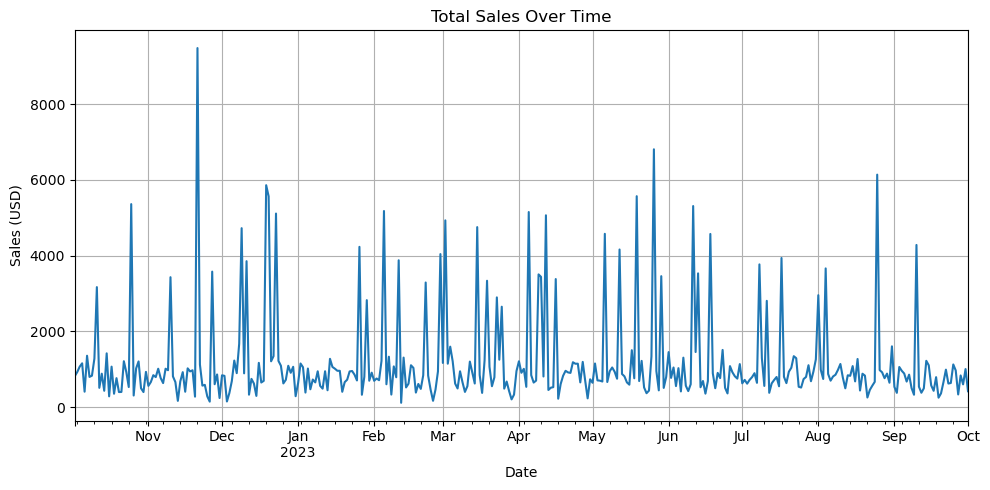

In [5]:
df['date_purchase'] = pd.to_datetime(df['date_purchase'])

sales_by_date = df.groupby('date_purchase')['purchase_amount_(usd)'].sum()

plt.figure(figsize=(10, 5))
sales_by_date.plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

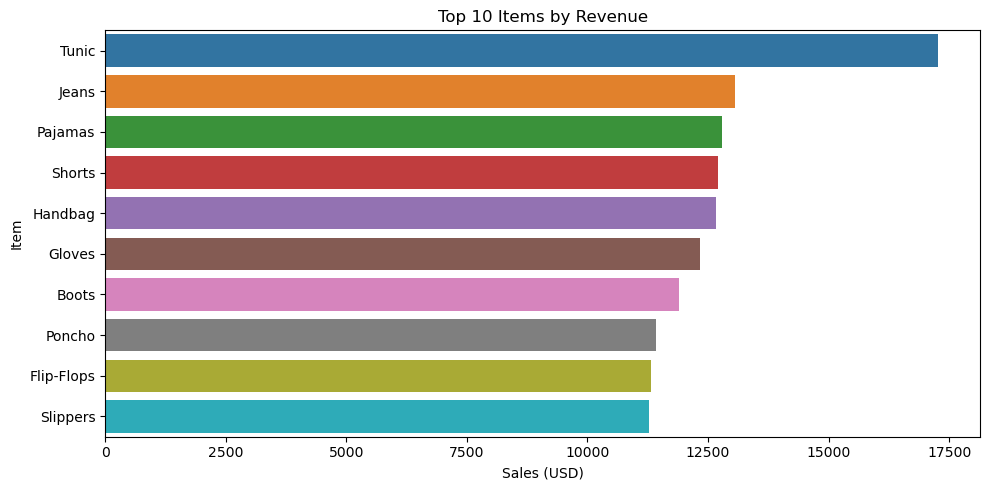

In [7]:
top_items = df.groupby('item_purchased')['purchase_amount_(usd)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_items.values, y=top_items.index)
plt.title("Top 10 Items by Revenue")
plt.xlabel("Sales (USD)")
plt.ylabel("Item")
plt.tight_layout()
plt.show()

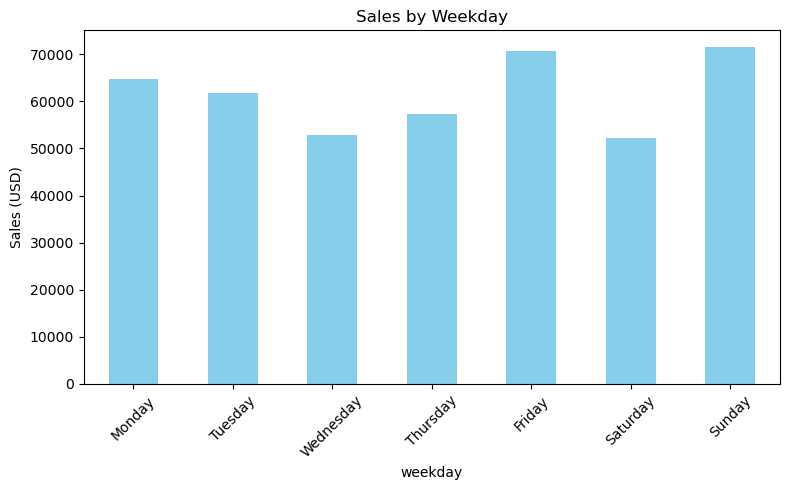

In [9]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = df.groupby('weekday')['purchase_amount_(usd)'].sum().reindex(weekday_order)

plt.figure(figsize=(8, 5))
weekday_sales.plot(kind='bar', color='skyblue')
plt.title("Sales by Weekday")
plt.ylabel("Sales (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

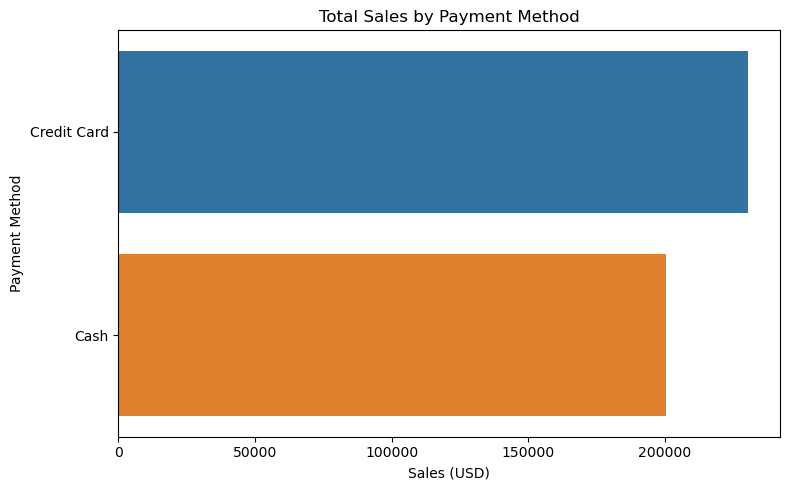

In [11]:
payment_sales = df.groupby('payment_method')['purchase_amount_(usd)'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_sales.values, y=payment_sales.index)
plt.title("Total Sales by Payment Method")
plt.xlabel("Sales (USD)")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()

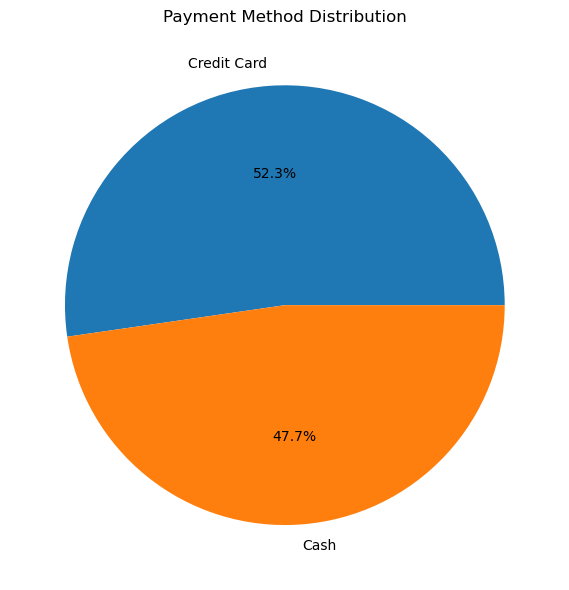

In [13]:
df['payment_method'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Payment Method Distribution')
plt.ylabel("")
plt.tight_layout()
plt.show()

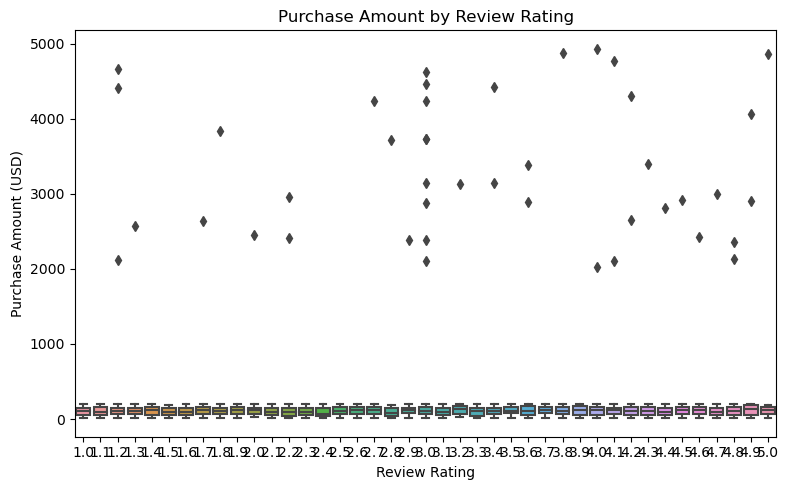

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='review_rating', y='purchase_amount_(usd)', data=df)
plt.title("Purchase Amount by Review Rating")
plt.xlabel("Review Rating")
plt.ylabel("Purchase Amount (USD)")
plt.tight_layout()
plt.show()

In [17]:
correlation = df[['review_rating', 'purchase_amount_(usd)']].corr()
print(correlation)

                       review_rating  purchase_amount_(usd)
review_rating               1.000000               0.040017
purchase_amount_(usd)       0.040017               1.000000


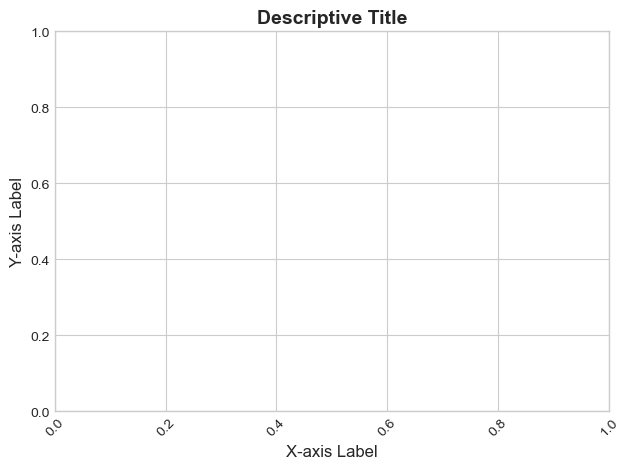

In [24]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.title("Descriptive Title", fontsize=14, fontweight='bold')
plt.xlabel("X-axis Label", fontsize=12)
plt.ylabel("Y-axis Label", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()